In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
#load the dataset

In [2]:
train_data = pd.read_csv('C:/Users/aarti/Downloads/train_data.csv')
test_data = pd.read_csv('C:/Users/aarti/Downloads/test_data.csv')

In [3]:
# Display the first few rows of the training dataset
print("Training Data")
print(train_data.head())

Training Data
        ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  \
0 

In [4]:
 #Display the first few rows of the test dataset
print("Test Data")
print(test_data.head())

Test Data
        ID Gender Has a car Has a property  Children count    Income  \
0  5091261      F         N              Y               0  202500.0   
1  5096963      M         Y              N               0  675000.0   
2  5087880      F         N              N               0  234000.0   
3  5021949      F         Y              Y               0  445500.0   
4  5105705      F         Y              N               0  225000.0   

      Employment status                Education level  Marital status  \
0         State servant  Secondary / secondary special       Separated   
1  Commercial associate               Higher education         Married   
2         State servant               Higher education  Civil marriage   
3  Commercial associate               Higher education         Married   
4               Working  Secondary / secondary special         Married   

              Dwelling    Age  Employment length  Has a mobile phone  \
0    House / apartment -16834           

In [5]:
# Exploratory Data Analysis
print("\nTraining Data Info")
print(train_data.info())


Training Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email    

In [6]:
print("\nTest Data Info")
print(test_data.info())


Test Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7

In [7]:
print("\nMissing Values in Training Data")
print(train_data.isnull().sum())


Missing Values in Training Data
ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [8]:
print("\nMissing Values in Test Data")
print(test_data.isnull().sum())


Missing Values in Test Data
ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [9]:
# Summary statistics
print("\nSummary Statistics - Training Data")
print(train_data.describe())


Summary Statistics - Training Data
                 ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                

In [10]:
print("\nSummary Statistics - Test Data")
print(test_data.describe())


Summary Statistics - Test Data
                 ID  Children count        Income           Age  \
count  7.292000e+03     7292.000000  7.292000e+03   7292.000000   
mean   5.078209e+06        0.428415  1.858672e+05 -15957.958722   
std    4.208243e+04        0.744350  1.032964e+05   4190.990010   
min    5.008809e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.041912e+06        0.000000  1.170000e+05 -19382.000000   
50%    5.069416e+06        0.000000  1.575000e+05 -15522.000000   
75%    5.115503e+06        1.000000  2.250000e+05 -12454.000000   
max    5.150487e+06       14.000000  1.575000e+06  -7489.000000   

       Employment length  Has a mobile phone  Has a work phone  Has a phone  \
count        7292.000000              7292.0       7292.000000  7292.000000   
mean        59283.630691                 1.0          0.230389     0.294158   
std        137642.577749                 0.0          0.421111     0.455695   
min        -15661.000000                 1.0    

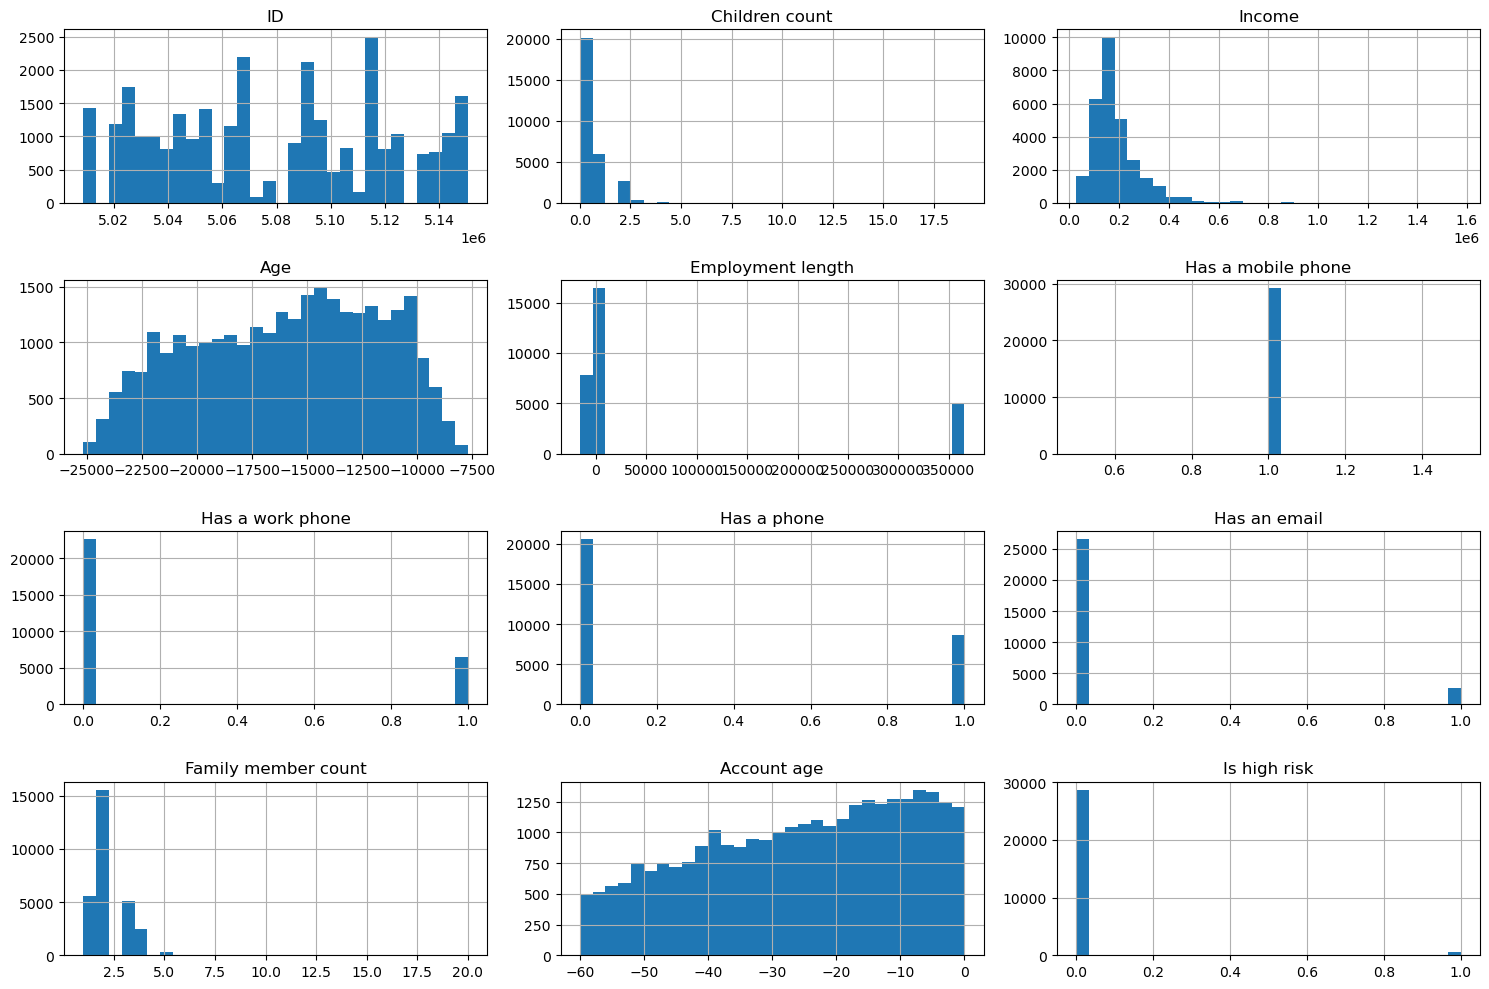

In [11]:
# Univariate analysis - Histograms for numerical features
train_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [12]:
# Univariate analysis - Count plots for categorical features
categorical_features = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 
                        'Marital status', 'Dwelling', 'Has a mobile phone', 'Has a work phone', 
                        'Has a phone', 'Has an email', 'Job title']

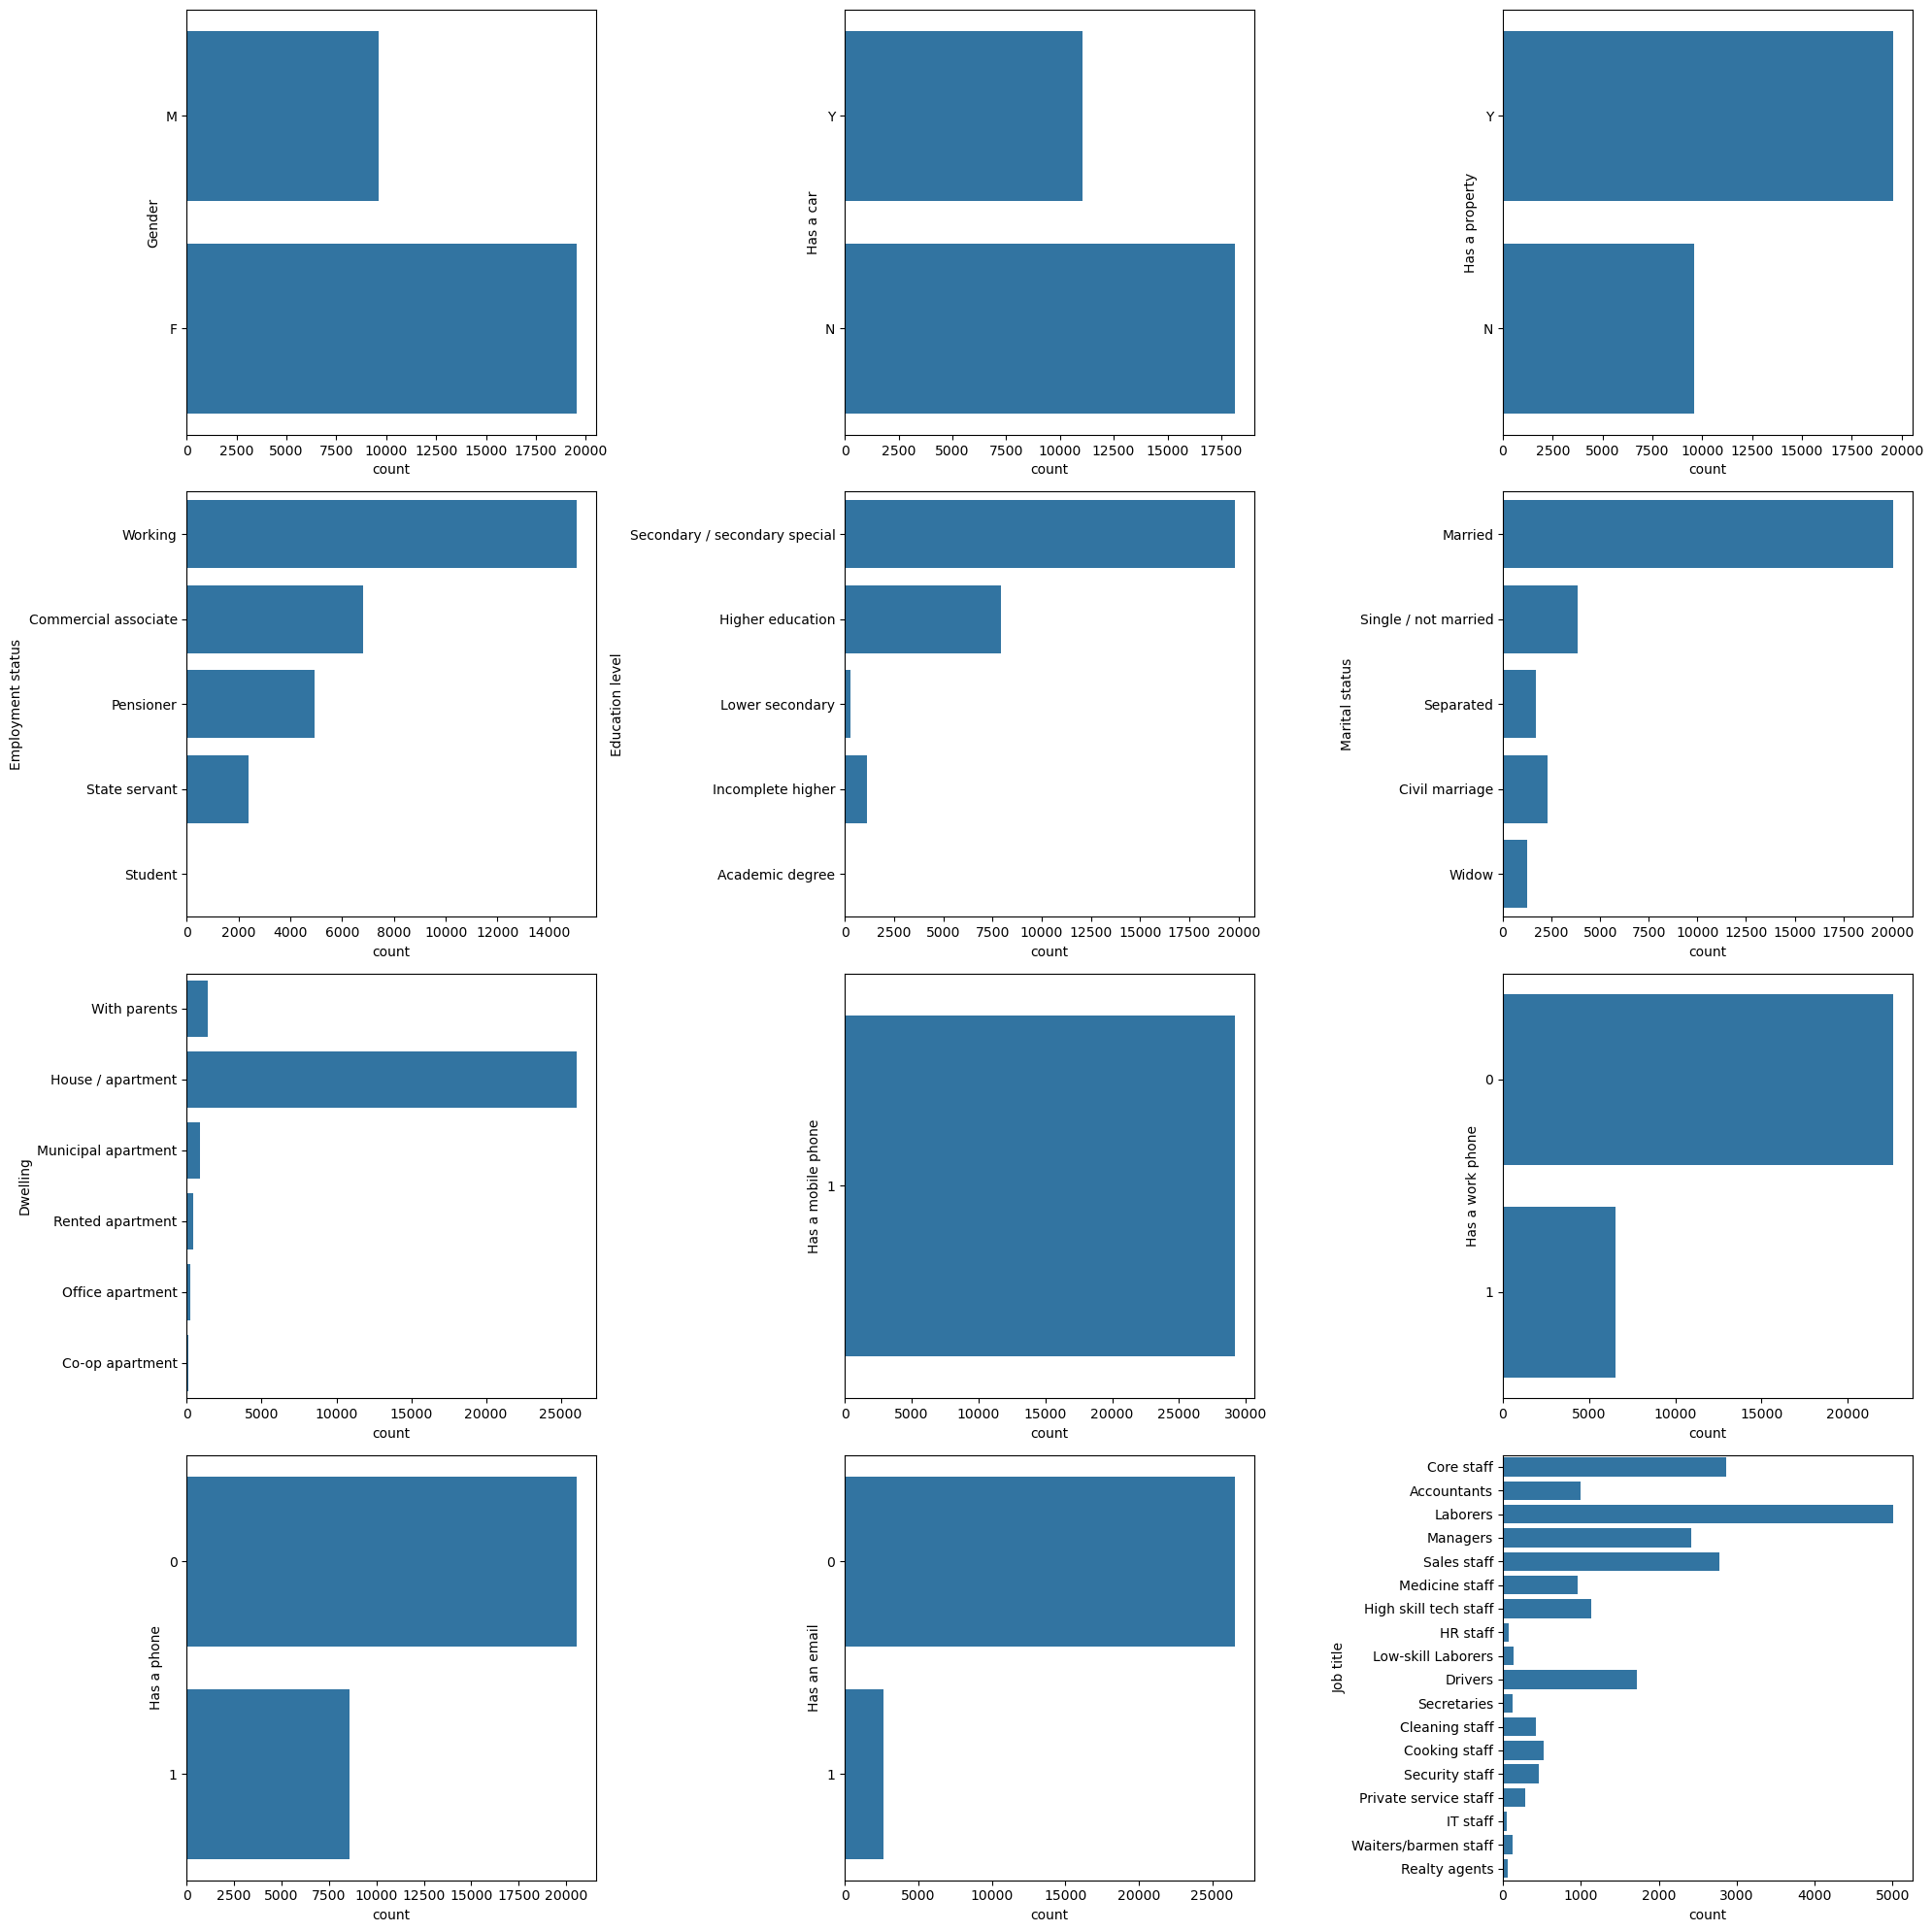

In [13]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=feature, data=train_data)
plt.tight_layout()
plt.show()

In [18]:
# Selecting a subset of features for the pair plot
subset_features = ['Income', 'Age', 'Employment length', 'Children count', 'Is high risk']

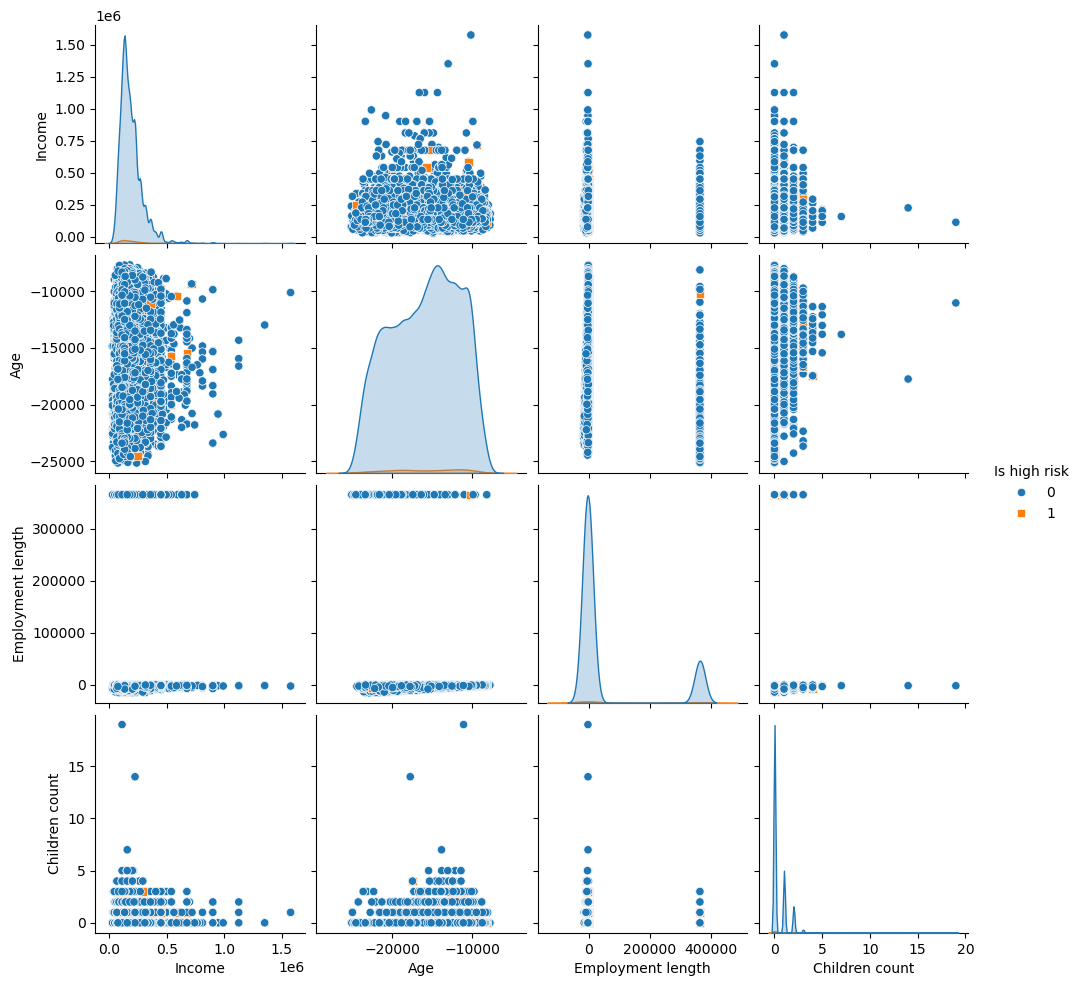

In [19]:
# Create the pair plot
sns.pairplot(train_data[subset_features], hue='Is high risk', diag_kind='kde', markers=['o', 's'])